In [ ]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
os.listdir()

['.config', 'resultsORCL_price.json', 'resultsIBM_price.json', 'sample_data']

# Data Analysis

In [ ]:
def load_data(path):
    with open(path, 'r') as file:
        data = json.load(file)

    rewards = [x['reward'] for x in data]
    actions = [x['actions'] for x in data]
    episodes = [x['episode'] for x in data]

    return rewards, actions, episodes

In [ ]:
def plot_rewards(episodes, rewards, ticker):
    # Create a plot
    plt.plot(episodes, rewards, marker='.')  # Line plot with markers

    # Labeling
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title(f'{ticker}: Reward per Epoch')

    # Show the plot
    plt.show()

In [ ]:
def plot_actions_histogram(actions, ticker):

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Histogram settings
    bins = np.arange(0, 4)  # Create bins between [0, 1, 2, 3]
    width = 0.8  # Width of each bar

    # Plot each epoch as a histogram
    for i, epoch_data in enumerate(actions):
        hist, bins = np.histogram(epoch_data, bins=bins)
        xs = (bins[:-1] + bins[1:])/2
        ax.bar(xs, hist, zs=i, zdir='y', width=width, alpha=0.7)

    # Labeling
    ax.set_xticks([0, 1, 2])
    ax.set_xlabel('Action')
    ax.set_ylabel('Epoch')
    ax.set_zlabel('Count')
    plt.title(f'{ticker}: 3D Histogram of Discrete Actions in Different Epochs')

    # Show the plot
    plt.show()

In [ ]:
def perform_analysis(path, ticker='ORCL'):
    # Load data from json file
    rewards, actions, episodes = load_data(path)
    # Plot the rewards accross all 50 episodes
    plot_rewards(episodes, rewards, ticker)
    # Plot the actions for each epoch in histogram format.
    plot_actions_histogram(actions, ticker)

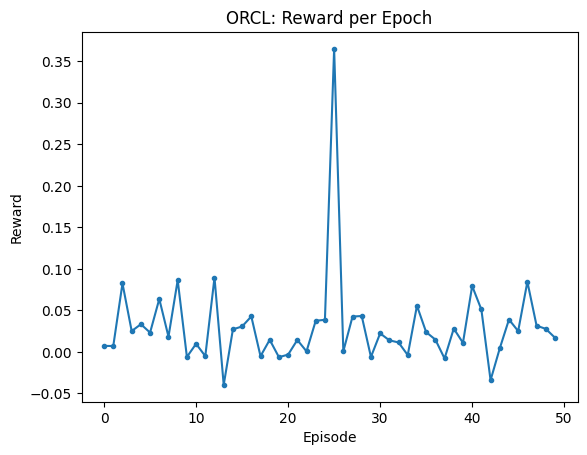

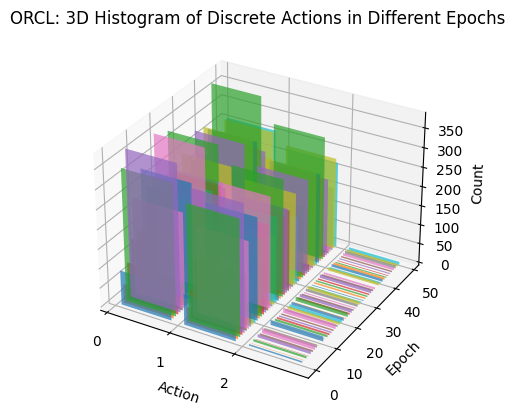

In [ ]:
perform_analysis('resultsORCL_price.json', ticker='ORCL')

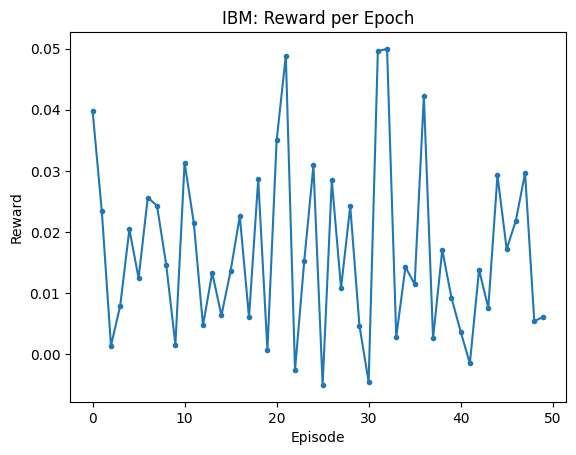

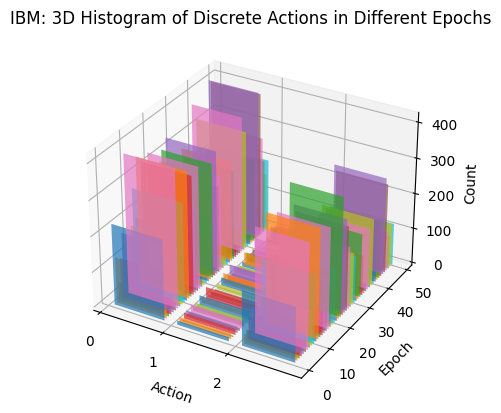

In [ ]:
perform_analysis('resultsIBM_price.json', ticker='IBM')